In [1]:
#global imports
import pandas as pd
import math
import seaborn as sns
import mpld3
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie,axis,show,figure
import seaborn as sns




In [2]:
#global constants
RUN_CRAWLER_AGAIN=False

# 1. retrive all statements

## 1.1 retrive all url without statements and get the statements using the crawler

In [3]:
poli_statements=pd.read_csv('dataset/politician_statements.csv')
poli_statements.head()

,date,speaker,title,party,media,score,field,subject,link,knesset,gender
0,25/08/2017,אבי גבאי,"על מתווה הגז, בעקבות הערכת החשב הכללי",עבודה,פייסבוק,untrue,כלכלה,מתווה הגז,https://www.thewhistle.co.il/feed/1l0L1amWva,הכנסת ה-20,male
1,25/08/2017,אבי גבאי,על מתווה הגז,עבודה,פייסבוק,half true,כלכלה,מתווה הגז,https://www.thewhistle.co.il/feed/e30EJDQWXQ,הכנסת ה-20,male
2,07/09/2017,אבי גבאי,על מחיר הגז הטבעי בעולם,עבודה,גל״צ,half true,כלכלה,מתווה הגז,https://www.thewhistle.co.il/feed/a5xQz3e0qA,הכנסת ה-20,male
3,24/09/2017,אבי גבאי,על ועדת צמח,עבודה,גל״צ,untrue,כלכלה,מתווה הגז,https://www.thewhistle.co.il/feed/GPxPq420a6,הכנסת ה-20,male
4,11/03/2018,אבי גבאי,על עמדת אייפא״ק,עבודה,כאן ב׳,untrue,חוץ ובטחון,סכסוך ישראלי-פלסטיני,https://www.thewhistle.co.il/feed/O4Wk2r50jb,הכנסת ה-20,male


In [4]:
NUM_OF_SPLITS=3

def get_array_of_divided_urls(poli_statements,num_of_splits):
    ##split dataframe to num_of_splits in order to save mid-results
    num_of_rows=len(poli_statements)
    divided_df=[]
    print('num of total rows is: {}'.format(num_of_rows))
    for i in range(num_of_splits):
      print('the start index is : {} , the end index is {}'.format(math.ceil(num_of_rows/num_of_splits)*(i),(math.ceil(num_of_rows/num_of_splits)*(i+1))))
      poli_statements_temp=poli_statements[(math.ceil(num_of_rows/num_of_splits)*(i)):(math.ceil(num_of_rows/num_of_splits)*(i+1))]
      divided_df=divided_df+[poli_statements_temp]
      print('the size of the new df is: {}'.format(poli_statements_temp.shape[0]))

    return divided_df


In [5]:
triple_df=get_array_of_divided_urls(poli_statements,NUM_OF_SPLITS)

num of total rows is: 444
the start index is : 0 , the end index is 148
the size of the new df is: 148
the start index is : 148 , the end index is 296
the size of the new df is: 148
the start index is : 296 , the end index is 444
the size of the new df is: 148


In [6]:
!pip install selenium
from bs4 import BeautifulSoup
from selenium import webdriver
#driver = webdriver.Chrome(executable_path="path/to/chromedriver.exe", chrome_options=options)


def get_main_quote(url):
  options = webdriver.ChromeOptions()
  options.add_argument('--no-sandbox')
  options.add_argument('--headless')
  options.add_argument('--disable-dev-shm-usage')
  wd = webdriver.Chrome('chromedriver',options=options)
  #open it, go to a website, and get results
  print('the url is: {}'.format((url)))
  wd.get(url)
  html=wd.page_source
  soup = BeautifulSoup(html, 'html.parser')
  #print("the url is {}".format(url))
  #print(html)
  try:
    method3 = soup.find('div', class_='main-quote').text
    print(method3)
    return method3
  except Exception as e:
    print('exception occured'.format(e))
    return -1

print('Checking Whistle website using crawler: {}'.format(RUN_CRAWLER_AGAIN))
full_ds_array=[]
if RUN_CRAWLER_AGAIN:
  #prepare()
    for en,poli_statements_part in enumerate(triple_df):
        poli_statements_part['main-quote']=poli_statements_part['link'].apply(get_main_quote)
        print(en)
        poli_statements_part.to_csv(path_or_buf='dataset/modified_data_p{}.csv'.format(en),encoding="utf-8")
        full_ds_array=full_ds_array+[poli_statements_part]
    all_stmt_ds=pd.concat([full_ds_array[0],full_ds_array[1],full_ds_array[2]])
else:
  #load data from previous run. no need to check whistle website again
    poli_statements_p0=pd.read_csv('dataset/modified_data_p0.csv',encoding="utf-8")
    poli_statements_p1=pd.read_csv('dataset/modified_data_p1.csv',encoding="utf-8")
    poli_statements_p2=pd.read_csv('dataset/modified_data_p2.csv',encoding="utf-8")
    all_stmt_ds=pd.concat([poli_statements_p0,poli_statements_p1,poli_statements_p2])
    all_stmt_ds.drop('Unnamed: 0',inplace=True,axis=1)

Checking Whistle website using crawler: False


In [7]:
len(all_stmt_ds)

444

## 1.2 retrive all hand-made statements.

In [8]:
handMadestmt=pd.read_csv('dataset/handMadeStmt.csv',encoding="utf-8")

In [9]:
#fix score True to TRUE(uppercase)
handMadestmt.loc[handMadestmt['score'] ==True, 'score'] = 'TRUE'

In [10]:
len(handMadestmt)

33

In [11]:
handMadestmt.head()

,date,speaker,title,party,media,score,field,subject,link,knesset,gender,main-quote
0,31/12/2019,אביגדור ליברמן,NaN,ישראל ביתנו,ועידת תחזיות,TRUE,NaN,NaN,NaN,NaN,male,"""החוק שמאפשר לראש ממשלה לכהן עד פסק דין חלוט ה..."
1,21/07/2019,אופיר אקוניס,NaN,הליכוד,פייסבוק,TRUE,NaN,NaN,NaN,NaN,male,"""לתקופה של ארבעה חודשים כיהנתי כממונה על רשות ..."
2,21/07/2019,אופיר אקוניס,NaN,הליכוד,פייסבוק,TRUE,NaN,NaN,NaN,NaN,male,"""קבעתי שתחנות הרדיו תקראנה ״קול ישראל״, כדי שכ..."
3,20/03/2019,אורלי לוי אבקסיס,NaN,גשר,פייסבוק,TRUE,בריאות,NaN,NaN,NaN,female,"""מדי יום מתים בישראל 13 בני אדם מוות מיותר כתו..."
4,12/03/2019,אורלי לוי אבקסיס,NaN,גשר,פייסבוק,TRUE,בריאות,NaN,NaN,NaN,female,"""למרות חוק בריאות חינם, 83% רוכשים ביטוח פרטי ..."


## 1.3 combine all statements into one dataframe and save it

handmade  + crawler-made

In [12]:
full_ds=pd.concat([all_stmt_ds,handMadestmt])

In [13]:
len(full_ds)

477

In [16]:
full_ds.to_csv(path_or_buf='dataset/full_ds.csv',encoding="utf-8-sig")

In [17]:
full_ds.head()

,date,speaker,title,party,media,score,field,subject,link,knesset,gender,main-quote
0,25/08/2017,אבי גבאי,"על מתווה הגז, בעקבות הערכת החשב הכללי",עבודה,פייסבוק,untrue,כלכלה,מתווה הגז,https://www.thewhistle.co.il/feed/1l0L1amWva,הכנסת ה-20,male,"""דיברו על 600 מיליארד. נתניהו אמר מאות מיליארד..."
1,25/08/2017,אבי גבאי,על מתווה הגז,עבודה,פייסבוק,half true,כלכלה,מתווה הגז,https://www.thewhistle.co.il/feed/e30EJDQWXQ,הכנסת ה-20,male,"""נתניהו אמר מאות מיליארדים. ועכשיו בעצם זה ירד..."
2,07/09/2017,אבי גבאי,על מחיר הגז הטבעי בעולם,עבודה,גל״צ,half true,כלכלה,מתווה הגז,https://www.thewhistle.co.il/feed/a5xQz3e0qA,הכנסת ה-20,male,"""לגרום לכך שאזרחי ישראל ישלמו 6 דולר עבור הגז,..."
3,24/09/2017,אבי גבאי,על ועדת צמח,עבודה,גל״צ,untrue,כלכלה,מתווה הגז,https://www.thewhistle.co.il/feed/GPxPq420a6,הכנסת ה-20,male,"""לפי הכללים של ועדת צמח, שהממשלה אישרה אותם ב-..."
4,11/03/2018,אבי גבאי,על עמדת אייפא״ק,עבודה,כאן ב׳,untrue,חוץ ובטחון,סכסוך ישראלי-פלסטיני,https://www.thewhistle.co.il/feed/O4Wk2r50jb,הכנסת ה-20,male,"""בכנס איפא""ק האחרון הייתה דרמה, כי באיפא""ק נאמ..."


### re read full_ds without re compute

In [5]:
import pandas as pd
full_ds=pd.read_csv('dataset/full_ds.csv')
full_ds.head(2)

,Unnamed: 0,date,speaker,title,party,media,score,field,subject,link,knesset,gender,main-quote
0,0,25/08/2017,אבי גבאי,"על מתווה הגז, בעקבות הערכת החשב הכללי",עבודה,פייסבוק,untrue,כלכלה,מתווה הגז,https://www.thewhistle.co.il/feed/1l0L1amWva,הכנסת ה-20,male,"""דיברו על 600 מיליארד. נתניהו אמר מאות מיליארד..."
1,1,25/08/2017,אבי גבאי,על מתווה הגז,עבודה,פייסבוק,half true,כלכלה,מתווה הגז,https://www.thewhistle.co.il/feed/e30EJDQWXQ,הכנסת ה-20,male,"""נתניהו אמר מאות מיליארדים. ועכשיו בעצם זה ירד..."


# 2. Basic insights

## 2.1 speaker distribution

In [6]:
#how many unique speakers we have: 
len(full_ds.speaker.unique())

121

In [7]:
spaeker_dist=full_ds.groupby(['speaker'])['speaker'].count().reset_index(name='count')

In [8]:
spaeker_dist.head(3)

,speaker,count
0,אבי גבאי,6
1,אבי דיכטר,1
2,אבי ניסנקורן,3


In [9]:
spaeker_dist['speaker_reverse']=spaeker_dist.loc[:,'speaker'].apply(lambda x: x[::-1])

In [10]:
spaeker_dist.head(3)

,speaker,count,speaker_reverse
0,אבי גבאי,6,יאבג יבא
1,אבי דיכטר,1,רטכיד יבא
2,אבי ניסנקורן,3,ןרוקנסינ יבא


In [11]:
from matplotlib.pyplot import figure
from bidi import algorithm as bidialg #package for showing hebrew text right to left

fig, ax = plt.subplots()

spaeker_dist.plot(x='speaker_reverse', y='count',kind='bar',ax=ax,figsize=(20,8))


plt.figure(figsize=(10,10))
fig.tight_layout()
#mpld3.display(fig)

NameError: name 'plt' is not defined

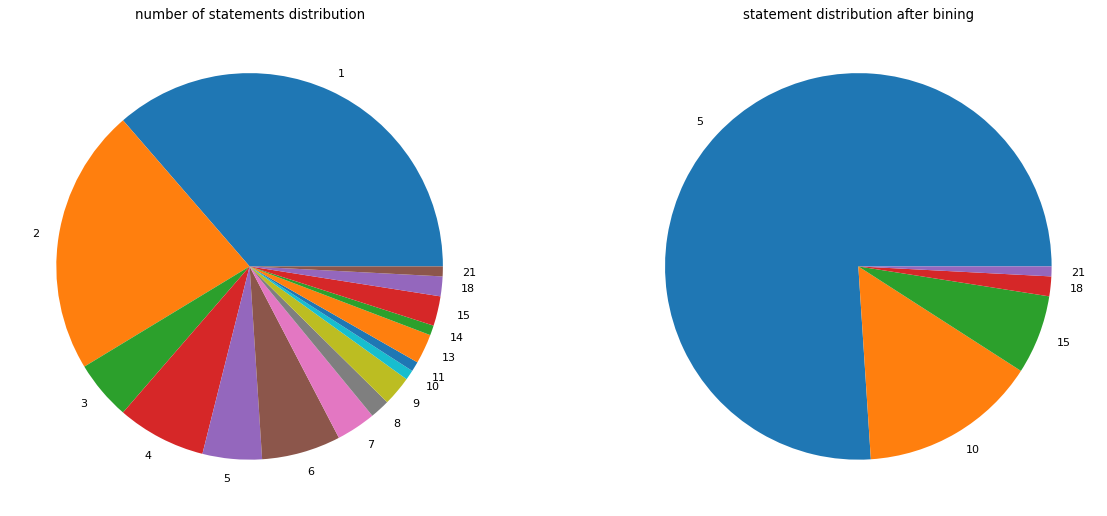

In [22]:
figure(num=None, figsize=(18, 8), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(1, 2, 1)

#pie chart number of statements distribution
speaker_dist_grouped=spaeker_dist.groupby(['count'])['count'].count().reset_index(name='Num_of_speakers')
#figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
pie(speaker_dist_grouped['Num_of_speakers'],labels=speaker_dist_grouped['count'])
plt.title('number of statements distribution')



plt.subplot(1, 2, 2)

#bining the data count
speaker_dist_stand=spaeker_dist.copy()
speaker_dist_stand.loc[speaker_dist_stand['count']<=5,'count']=5
speaker_dist_stand.loc[(speaker_dist_stand['count']<=10) &  (speaker_dist_stand['count']>5),'count']=10
speaker_dist_stand.loc[(speaker_dist_stand['count']<=15) &  (speaker_dist_stand['count']>10),'count']=15
plt.title('statement distribution after bining')


speaker_dist_stand_grouped=speaker_dist_stand.groupby(['count'])['count'].count().reset_index(name='Num_of_speakers')


#plot
#figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
pie(speaker_dist_stand_grouped['Num_of_speakers'],labels=speaker_dist_stand_grouped['count'])

show()

In [23]:
#score per speaker :

score_speaker_dist=full_ds.groupby(['speaker','score'])['speaker'].count().reset_index(name='count')
score_speaker_dist.head(4)

,speaker,score,count
0,אבי גבאי,half true,2
1,אבי גבאי,mostly untrue,1
2,אבי גבאי,untrue,3
3,אבי דיכטר,TRUE,1


In [24]:
#how many distinct speaker we have for each category score 
score_speaker_dist.groupby(['score'])['count'].count().reset_index(name='count')

,score,count
0,TRUE,47
1,half true,41
2,misleading,5
3,mostly true,31
4,mostly untrue,57
5,untrue,78


it can be seen that almost 65% from the speakers has 'untrue' statements
it can be seen that almost 65% from the speakers has 'untrue' statements
it can be seen that almost 65% from the speakers has 'untrue' statements
it can be seen that almost 65% from the speakers has 'untrue' statements
it can be seen that almost 65% from the speakers has 'untrue' statements


In [85]:
true_list=score_speaker_dist[score_speaker_dist.score=='TRUE'][['speaker']].speaker.to_dict()
true_set=set(true_list.values())


half_true_list=score_speaker_dist[score_speaker_dist.score=='half true'][['speaker']].speaker.to_dict()
half_true_set=set(half_true_list.values())

misleading_list=score_speaker_dist[score_speaker_dist.score=='misleading'][['speaker']].speaker.to_dict()
misleading_set=set(misleading_list.values())


mostly_true_list=score_speaker_dist[score_speaker_dist.score=='mostly true'][['speaker']].speaker.to_dict()
mostly_true_set=set(mostly_true_list.values())


mostly_untrue_list=score_speaker_dist[score_speaker_dist.score=='mostly untrue'][['speaker']].speaker.to_dict()
mostly_untrue_set=set(mostly_untrue_list.values())

untrue_list=score_speaker_dist[score_speaker_dist.score=='untrue'][['speaker']].speaker.to_dict()
untrue_set=set(untrue_list.values())

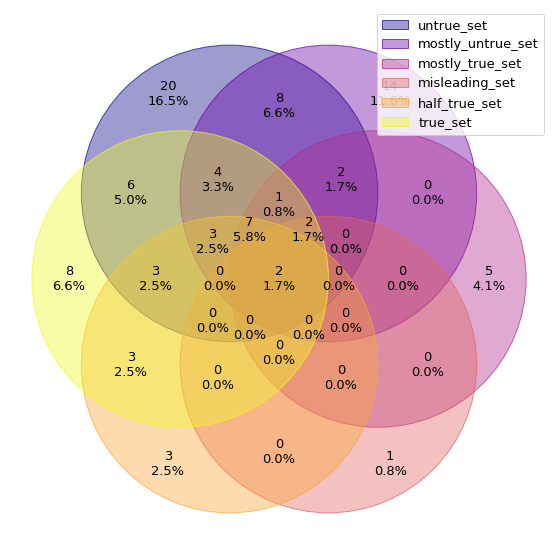

In [107]:
from venn import venn
from venn import pseudovenn

%matplotlib inline

score_sets = {
    "untrue_set":untrue_set,
    "mostly_untrue_set": mostly_untrue_set,
    "mostly_true_set": mostly_true_set,
    "misleading_set": misleading_set,
    "half_true_set" : half_true_set,
    "true_set":true_set
}

pseudovenn(score_sets, cmap="plasma",fmt="{size}\n{percentage:.1f}%",hint_hidden=False,figsize=(10, 10),legend_loc="best")

number of total unique speakers in this diagram is 121 of 121 speakers total


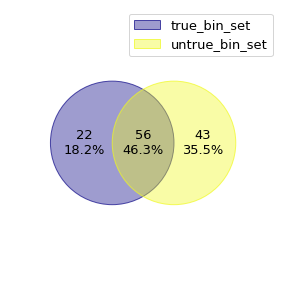

In [153]:
# venn diagram with bins for scores: { True true_set+mostly_true_set: ,Untrue: untrue_set+mostly_untrue_set,half_true_set,misleading_set}
#new bins sets 
from venn import venn
from venn import pseudovenn

%matplotlib inline
true_bin_set=true_set.union(mostly_true_set).union(half_true_set)
untrue_bin_set=untrue_set.union(mostly_untrue_set).union(misleading_set)


bins_score_sets = {
    "true_bin_set":true_bin_set,
    "untrue_bin_set": untrue_bin_set
}

venn(bins_score_sets, cmap="plasma",fmt="{size}\n{percentage:.1f}%",hint_hidden=False,figsize=(5, 5),legend_loc="best")
unique_speakers=true_bin_set.union(untrue_bin_set)
print('number of total unique speakers in this diagram is {} of 121 speakers total'.format(len(unique_speakers)))

## 2.2 gender distribution

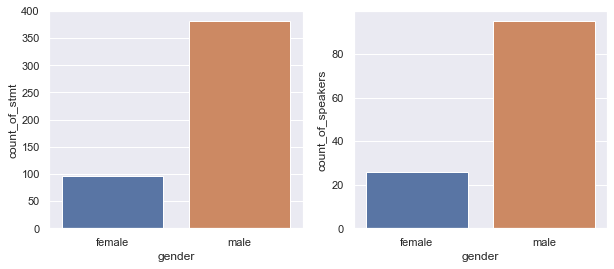

In [234]:
fig, ax =plt.subplots(1,2,figsize=(10,4))

#statements by gender : male vs female
gender_dist=full_ds.groupby(['gender'])['gender'].count().reset_index(name='count_of_stmt')
sns.barplot(x='gender',y='count_of_stmt',data=gender_dist,ax=ax[0])

#distinct speakers by gender : male vs female 
distinct_speaker_gender=full_ds[['speaker','gender']].drop_duplicates()
distinct_speaker_gender=distinct_speaker_gender.groupby(['gender'])['gender'].count().reset_index(name='count_of_speakers')
sns.barplot(x='gender',y='count_of_speakers',data=distinct_speaker_gender,ax=ax[1])


## 2.2.1 who lie the most? 

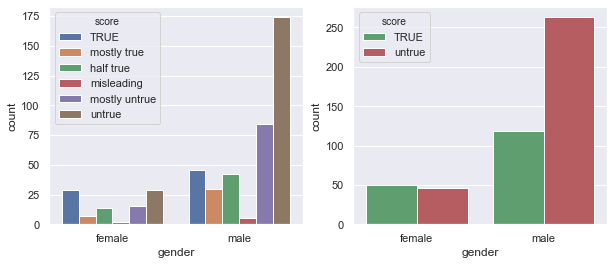

In [248]:
fig, ax =plt.subplots(1,2,figsize=(10,4))

score_gender=full_ds.groupby(['gender','score']).size().reset_index(name='count')
sns.catplot(x="gender", y="count", hue="score", kind="bar", data=score_gender,hue_order=['TRUE','mostly true','half true','misleading','mostly untrue','untrue'],ax=ax[0])


#create full_ds with bins for scores 
full_ds_score_bins=full_ds.copy()
full_ds_score_bins.loc[full_ds_score_bins['score']=='half true','score']='TRUE'
full_ds_score_bins.loc[full_ds_score_bins['score']=='mostly true','score']='TRUE'

full_ds_score_bins.loc[full_ds_score_bins['score']=='misleading','score']='untrue'
full_ds_score_bins.loc[full_ds_score_bins['score']=='mostly untrue','score']='untrue'

score_gender_bins=full_ds_score_bins.groupby(['gender','score']).size().reset_index(name='count')
sns.catplot(x="gender", y="count", hue="score", kind="bar", data=score_gender_bins,palette=['g','r'],ax=ax[1])

plt.close(2)
plt.close(3)
plt.show()

 as we can see the feamle statements concerning the "pure" TRUE and "pure" UNTRUE is relatively balanced
 in contrast to male statements.

## 2.3 media distribution  

In [12]:
media_dist=full_ds.groupby('media').size().reset_index(name='count')
media_dist=media_dist.replace(regex=[r'^רדיו.*$',r'^גל.צ.*',r'^גלי.*',r'.*FM.*',r'כאן ב.*',r'.*רק"ע.*',r'.*מורשת.*'],value='Radio')
media_dist=media_dist.replace(regex=[r'^ערוץ.*',r'רשת',r'.*אולפן.*',r'חברת החדשות',r'קשת',r'כאן 11',r'פגוש את העיתונות'],value='TV')
media_dist=media_dist.replace(regex=[r'טוויטר',r'פייסבוק'],value='Social Media')
media_dist=media_dist.replace(regex=[r'ידיעות אחרונות',r'דה-מרקר',r'הארץ',r'גלובס',r'הודעה לעיתונות',r'כלכליסט'],value='Print Newspapers')
media_dist=media_dist.replace(regex=[r'נאום',r'.*כנסת.*',r'כנס',r'.*וואלה.*',r'.*ועידת.*',r'.*מסיבת.*'],value='Other')


#media_dist=media_dist.groupby('media')['count'].sum().reset_index(name='count')


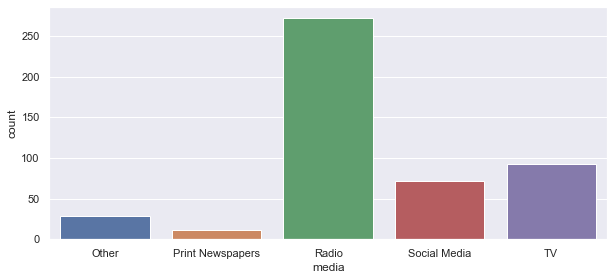

In [250]:
sns.set(rc={'figure.figsize':(10,4.27)})
sns.barplot(x='media',y='count',data=media_dist)

## 2.3.1 distribution by statements spoken vs. written

In [20]:
#create csv with new column , written or spoken

#first stage
full_ds=full_ds.replace(regex=[r'^רדיו.*$',r'^גל.צ.*',r'^גלי.*',r'.*FM.*',r'כאן ב.*',r'.*רק"ע.*',r'.*מורשת.*'],value='Radio')
full_ds=full_ds.replace(regex=[r'^ערוץ.*',r'רשת',r'.*אולפן.*',r'חברת החדשות',r'קשת',r'כאן 11',r'פגוש את העיתונות'],value='TV')
full_ds=full_ds.replace(regex=[r'טוויטר',r'פייסבוק'],value='Social Media')
full_ds=full_ds.replace(regex=[r'ידיעות אחרונות',r'דה-מרקר',r'הארץ',r'גלובס',r'הודעה לעיתונות',r'כלכליסט'],value='Print Newspapers')
full_ds=full_ds.replace(regex=[r'נאום',r'.*כנסת.*',r'כנס',r'.*וואלה.*',r'.*ועידת.*',r'.*מסיבת.*'],value='Other')

#second stage
full_ds=full_ds.replace(regex=[r'Radio',r'TV',r'Other'],value='spoken')
full_ds=full_ds.replace(regex=[r'Social Media'],value='written')
full_ds=full_ds.replace(regex=[r'Print Newspapers'],value='other')



In [29]:
full_ds[['media']].to_csv('media_type.csv',index=None)

In [13]:
#group by text or spoken
media_dist=media_dist.replace(regex=[r'Radio',r'TV',r'Other'],value='spoken')
media_dist=media_dist.replace(regex=[r'Social Media'],value='written')
media_dist=media_dist.replace(regex=[r'Print Newspapers'],value='other')

media_dist=media_dist.groupby('media')['count'].sum().reset_index(name='count')
sns.barplot(x='media',y='count',data=media_dist)

In [14]:
media_dist

,media,count
0,spoken,28
1,other,12
2,spoken,272
3,written,72
4,spoken,93


## 2.3.2 score-written distribution

In [282]:
full_ds_ext=full_ds.copy()
full_ds_ext.loc[full_ds_ext.media.str.contains(r'^רדיו.*$|^גל.צ.*|^גלי.*|.*FM.*|כאן ב.*|.*רק"ע.*|.*מורשת.*', na=False, regex=True), 'written'] = False
full_ds_ext.loc[full_ds_ext.media.str.contains(r'^ערוץ.*|רשת|.*אולפן.*|חברת החדשות|קשת|כאן 11|פגוש את העיתונות', na=False, regex=True), 'written'] = False
full_ds_ext.loc[full_ds_ext.media.str.contains(r'טוויטר|פייסבוק', na=False, regex=True), 'written'] = True
full_ds_ext.loc[full_ds_ext.media.str.contains(r'ידיעות אחרונות|דה-מרקר|הארץ|גלובס|הודעה לעיתונות|כלכליסט', na=False, regex=True), 'written'] = False
full_ds_ext.loc[full_ds_ext.media.str.contains(r'נאום|.*כנסת.*|כנס|.*וואלה.*|.*ועידת.*|.*מסיבת.*', na=False, regex=True), 'written'] = False

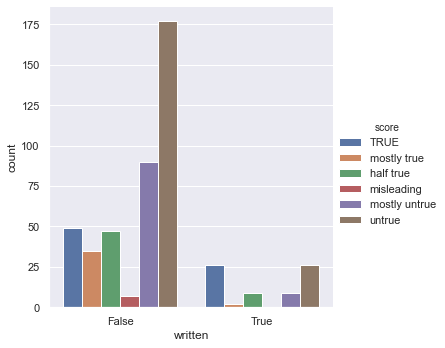

In [284]:
written_score_dist=full_ds_ext.groupby(['score','written']).size().reset_index(name='count')
sns.catplot(x="written", y="count", hue="score", kind="bar", data=written_score_dist,hue_order=['TRUE','mostly true','half true','misleading','mostly untrue','untrue'])

## 2.4 statement by score aka labels 

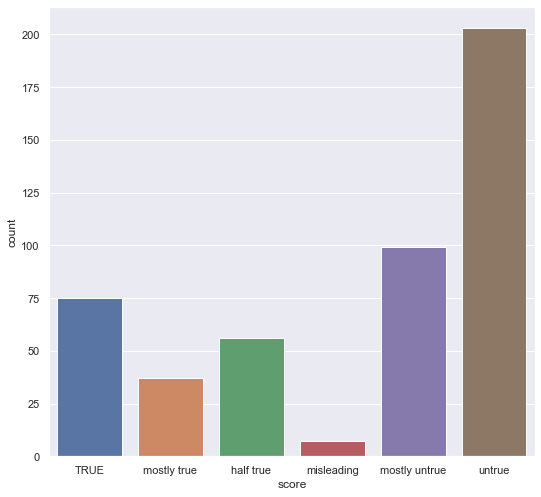

In [71]:
#score analyze
score_dist=full_ds.groupby(['score'])['score'].count().reset_index(name='count')
sns.set(rc={'figure.figsize':(8.7,8.27)})
sns.barplot(x='score',y='count',data=score_dist,order=['TRUE','mostly true','half true','misleading','mostly untrue','untrue'])